# Início: 01/10/2021

Do mesmo modo que as SVMs, as Árvores de Decisão são algoritmos versáteris de AM que podem executar tarefas de classificção, regressão e multioutput. São algoritmos bem poderosos qe são capazes de moldar conjuntos complexos de dados.

As Árvores de Decisão são componentes fundamentais das Florestas Aleatórias (melhor detalhadas no Capítulo 7), que são os algoritmos de AM mais poderosos conhecidos.

Neste Capítulo, vamos começar como o treino, visualização e previsão realizado pelas Árvores de Decisão. Continaremos através do algoritmo de treino CART usado pelo Sciki-Learn e discutirmos como regularizar árvores e usá-las para tarefas de regressão. Por fim, veremos algumas limitações das Árvores de Decisão.

### Treinando e Visualizando uma Árvore de Decisão

Para entendermos esse algoritmo, vamos contruir um e observar em como ele reliza as previsões. O código abaixo treina um **DecisionTreeClassifier** no conjunto de dados da íris:

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

In [52]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Podemos analisar a Árvore de Decisão usando o método **plot_tree()** para ter como saída uma plotagem do grafo gerado:

In [6]:
from sklearn import tree

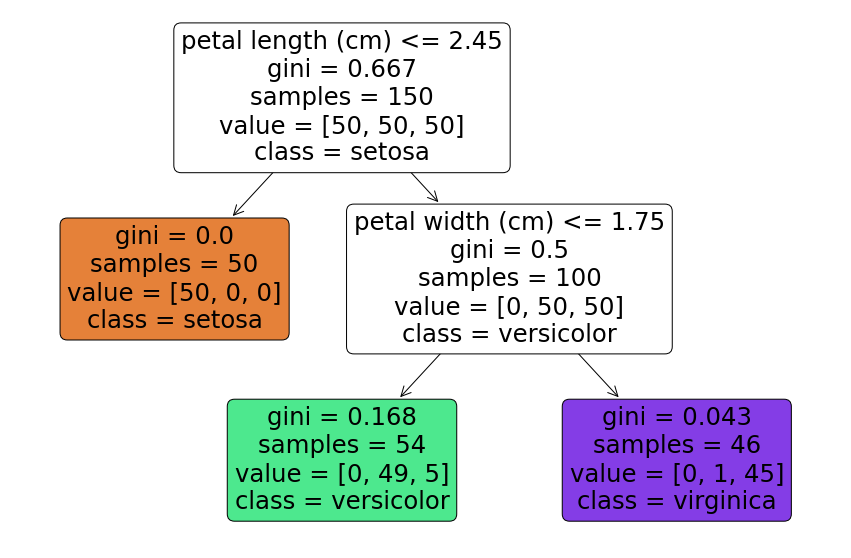

In [7]:
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_clf,
              feature_names=iris.feature_names[2:],
              class_names=iris.target_names,
              rounded=True,
              filled=True)

plt.show()

As flechas para a esquerda representam *True* para a característica, e para direita, *False*. Se verdadeiro, não há mais porque continuar, se falso; então continuar para ver em qual espécie, nesse caso, cada íris pertence.

### Fazendo Previsões

Observe a maneira de como a árvore é contruída. Suponha que encontremos uma flor de íris e desejamos classificá-la. Começamos no *nó da raiz* (profundidade 0, primeiro quadrado): este nó pergunta se o comprimento da pétala é menor que 2,45 cm. Se for, então descemos um nível (profundidade 1) para a esquerda. Neste caso, é um *nó da folha*, isto é: não possui um nó filho, por esse motivo ele não faz mais nenhuam pergunta. Podemos simplesmente analisar a classe prevista para esse nó e o algoritmo preverá que a flor a ser classificada é uma Iris Setosa (**class=setosa**).

Por outro lado, imagine que encontramos uma flor com a pétala medindo mais do que 2,45 cm. O nó filho agora pega o caminho da direita (profundidade 1), que não é o *nó da folha*, então o algoritmo faz mais uma pergnta: a largura da pétala é maior do que 1,75 cm? Se sim, então a flor encontrada é uma Irir Versicolor (profundiade 2), o caminho seguido é o da esquerda. Se a largura for menor, então é uma Iris Virginica, à direita. Simples assim.

Uma das grandes vantagens de usar as Árvores de Decisão é que elas exigem bem menos tempo na preparação dos dados. Em particular, elas não pedem escalonamento ou a centralização de características.

O atributo **samples** de um nó conta a quantidade de instâncias de treino a que se aplica. Por exemplo, 100 instâncias de treino possuem o comprimento da pétala maior que 2,45 cm (profundidade 2, esquerda); onde 54 possuem a largura menor do que 1,75 cm (profundidade 2, direita). O atributo **value** de um nó nos informa a quantas instâncias de treino de cada classe o nó em questão se aplica: por exemplo, o nó da profundidade 2 na direita aplica-se a 0 Iris Setosa, 1 Iris Versicolor e 45 Iris Virginica. Por fim, o atributo **gini** de um nó mede a *impureza*: um nó é "puro" (**gini=0**) se todas as instâncias de treino pertencem à mesma classe a qual se aplica. Por exemplo, uma vez que o nó esquerdo na profundidade 1 aplica-se apenas paras as instâncias de treino de Iris Setosa, ele é puro e a pontuação **gini** é 0. A fórmula abaixo mostra como a Árvore de Decisão calcula o *Gi* do i-*ésimo* nó. Por exemplo, o nó esquerdo na profundidade 2 possui a pontuação de **gini** igual a 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 ≈ 0,168.

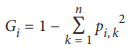
***Equação 6-1. Coeficiente de Gini***

Onde:
- *Pi,k* é a média das instâncias da classe *k* entre as instâncias de treino no nó *i*.

O Scikit-Learn usa o algoritmo CART, cujo produz somente *árvores binárias*, ou seja, cada nó gera sempre doi filhos; é somente sim e não, verdadeiro e falso. Contudo, há outros algoritmos, como o ID3, que podem gerar Árvores de Decisão com mais de dois filhos.

O código abaixo mostra os limites de decisão do algoritmo. A linha vertical grossa representa o limite do nó raiz (profundidade 0): comprimento da pétala = 2,45 cm. Uma vez que o lado esquerdo é puro (somente Iris Setosa), ela não pode ser dividida mais. Contudo, o lado direito é impuro, logo o nódulo direito de profundidade 1 divide no valor de 1,75 cm (linha tracejada). Como definimos o máximo de profundidade para 2 (**max_depth=2**), o algoritmo para por aqui. Porém, se definirmos esse hiperparâmetro como 3, os dois nós encontrados na profunidade 2 adicionarão um outro limite de decisão, representada pela linha pontilhada:

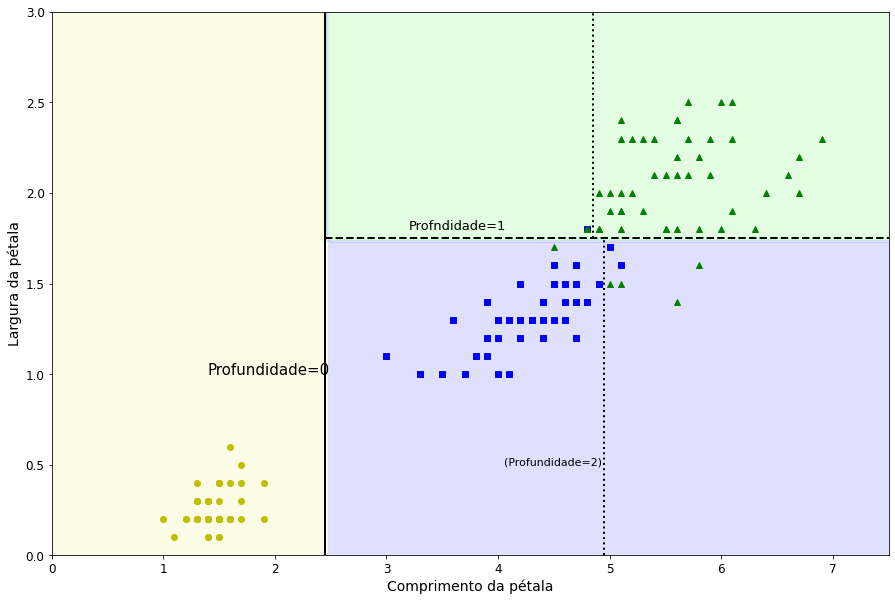

In [8]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3],
                           iris=True, legend=False,
                           plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff',
                                  '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f',
                                       '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2,
                    alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo",
                 label="Iris Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs",
                 label="Iris Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^",
                 label="Iris Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Comprimento da pétala", fontsize=14)
        plt.ylabel("Largura da pétala", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(15, 10))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Profundidade=0", fontsize=15)
plt.text(3.2, 1.80, "Profndidade=1", fontsize=13)
plt.text(4.05, 0.5, "(Profundidade=2)", fontsize=11)

plt.show()

**Interpretação do Modelo: Caixa Branca versus Caixa Preta**

Como podemos notar, as Árvores de Decisão são bem intuitivas e á fácil interpretar o resultados retornados. Esses modelo na maioria das vezes são conhecidos como *modelo de caixa branca*. Em contraste, as Florestas Aleatórias ou as redes neurais, na maior parte dos casos, são consideradas *modelos de caixa preta*. Elas conseguem realizar grandes previsões e podemos verificar facilmente os cálculos feitos para a obtenção das mesmas; todavia, é complicado explicar em termos simples os motivos que as previsões foram realizadas. Por exemplo, se uma rede neural informa que uma determinada pessoa está em uma imagem, é difícil saber o que realmente contribuiu para a previsão: o modelo reconheceu a boca da pessoa? Os olhos? Os sapatos? O nariz? Ou até mesmo o sofá onde ela está sentada? De modo contrário, as Árvores de Decisão entregam regras simples de classificação que podem ser aplicadas mesmo manualmente se for preciso, por exemplo, para a classificação de uma flor).

### Estimando as Probabilidades de Classes

Uma Árvore de Decisão também pode estimar a probabilidade de uma instância ser de uma classe específica *k*: primeiro o algoritmo atravessa a árvore para encontrar o nó da folha para esta instância e, em seguida, retorna a taxa de instâncias de treino da classe *k* neste mesmo nó. Por exemplo, imagine que o algoritmo tenha encontrado uma flor onde as pétalas possuem o comprimento de 5 cm e a largura de 1,5 cm. O nó da folha correspondente está na profundidade 2 no lado esquerdo, logo o algoritmo deve mostrar as seguintes probabilidades: 0% para Iris Setosa (0/54); 90,7% para Iris Versicolor (49/54) e 9,3% para Iris Virginica (5/54). E é óbvio, se pedirmos para o algoritmo indicar a classe, ele retornará o valor 1 (Iris Versicolor), uma vez que a maior valor de probabilidade é dessa classe:

In [9]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [10]:
tree_clf.predict([[5, 1.5]])

array([1])

### Algoritmos de Treinamento CART

O Scokit-Learn usa o algoritmo da *Árvore de Classificação e Regressão* (CART, em inglês) para treinar as árvores de decisão (conhecidas também como árvores "*em crescimento*"). A ideia é bem simples: primeiro o conjunto de treino é dividido em dois subconjuntos usando uma única característica *k* e um limiar *tk* (por exemplo, o comprimento da pétala ≤ 2,45 cm). Mas como o algoritmo escolhe *k* e *tk*? Ele busca pelo par (*k*, *tk*) que produz os subconjuntos mais puros (ponderados pelo tamanho), ou seja, o valor de **gini** mais próximo de 0. A equação a seguir mostra a função de custo deste algoritmo.

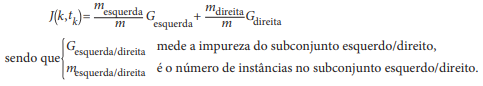

***Equação 6-2. Função de custo CART para classificação***

Depois de separar com sucesso o conjunto de treino em dois, ele divide os subconjuntos usando a mesma lógica, depois divide esses sbconjuntos recém criados e assim por diante. O algoritmo só para de fazer isso quando atinge a profundidade máxima (definida pelo hiperparâmetro **max_depth**) ou se não conseguir mais encontrar uma divisão que reduza o valor de **gini**. ALguns outros hiperparâmetros controlam as condições adicionais de parada (**min_samples_split**, **min_samples_leaf**, **min_weight_fraction_leaf** e **max_leaf_nodes**).

Como podemos ver, o CART é um algoritmo *ganacioso*: ele busca uma divisão otimizada no nível superior e, em seguida, repete o processo em cada nível. Ele não verifica se a divisão erá ou não resultar no menor valor de **gini** nos vários níveis abaixo. Um algoritmo ganancioso na maior parte das vezes produz uma solução ligeiramente boa, mas não é a garantia de uma solução ideal.

Infelizmente, encontrar a árvore ideal é conhecido por ser um problema do tipo *NP-Completo* (P = NP): ele requer um tempo de processamento de *O(exp(m))*, tornando assim um problema intratável mesmo para conjuntos de treino bem pequenos. Por esse motivo é que devemos ficar satisfeitos com uma solução "ligeiramente boa".

### Coeficiente de Gini ou Entropia?

A medida do *coeficiente de Gini* é aplicada por padrão, mas podemos selecionar a medida de impureza da *entropia* ao configurar o hiperparâmetro **criterion** para "**entropy**". O conceito de entropia vem da termdinâmica como uma medida de desordem da matéria: quanto mais próximo de 0, mais ordenado o sistema está. Esse conceito espalhou-se para várias áreas, incluindo a *Teoria da Informação* de Shannon, onde mede o conteúdo médio de informações de uma mensagem: a entropia é zero quando todas as mensagem são idênticas. No AM, ela é bem usada como uma medida do coeficiente: a entropia do conjunto é zero quando possui instâncias de apenas uma classe. A equação abaixo mostra a definição da entropia para o i-*ésimo* nó. Por exemplo, o nó do lado esquerdo na profundidade 2 possui uma entropia igual a:
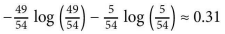

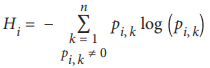

***Equação 6-3. Entropia***

Portanto, nesse caso, devemos sar o coeficiente de Gini ou a entropia? Na verdade, na maioria dos casos não muda muita coisa: ambos levam para árvores semelhantes. O coeficiente de Gini é um pouco mais rápido de se calcular, então é usado como padrão. Contudo, quando existe uma divergência, o coeficiente de Gini tende a isolar a classe mais frequente em seu próprio ramo da árvore, enquanto a entropia tende a gerar árvores mais equilibradas.

### Hiperparâmetros de Regularização

As Árvores de Decisão fazem poucos pressupostos sobre os dados de treino. Se for deixada sem restrições, a estrutura da árvore se adaptará aos dados de treino bem de perto, muito provavelmente sobreajustando-se. Tal modelo geralmente é conhecido como *modelo não paramétrico*, não porque ele não possui parâmetros, mas porque o número de parâmetros não é determinado antes do treino, então o estrutura do algoritmo está livre para ficar próxima dos dados.

Do outro lado, um *modelo paramétrico* possui um número predeterminado de parâmetros, então o grau de liberdade é limitado, reduzindo o risco de sobreajuste, mas aumentando as chances de subajustes.

Para evitar o sobreajuste nos dados de treino, precisamos restringir a liberdade da Árvore de Decisão durante o treino. Como sabemos, isso conhecido como regularização. Os hiperparâmetros de regularização dependem do algoritmo usado, mas geralmente podemos, pelo menos, restringir a profundidade máxima desse algoritmo. No Scikit-Learn, isto é controlado pelo hiperparâmetro **max_depth** (o valor padrão é *None*, o que indica que é ilimitado). Redzir esse hiperparâmetro regularizá o modelo e reduzirá o risco de sobreajuste.

A classa **DecsionTreeClassifier** possui alguns outros parâmetros que restringem de modo semelhante a forma da Árvore de Decisão: **min_samples_split** (número mínimo de amostras que um nó deve ter antes que possa ser dividido). **min_samples_leaf** (número mínimo de amostrar que um nó da folha deve ter), **min_weight_fraction_leaf** (o mesmo do anterior, mas expressa como uma fração do número total de instâncias ponderadas), **max_leaf_nodes** (número máximo de nós da folha) e **max_features** (número máximo de características que são avaliadas para divisão em cada nó). Aumentar os hiperparâmetros **min_*** ou reduzir os **max_*** regularizará o modelo.

Outros algoritmos funcionam primeiro treinando a Árvore de Decisão sem restrições, em seguida *podando* (eliminando) nós desnecessários. Um nó cujo filhos são todos nós da folha é considerado desnecessário caso a diminuição do coeficiente Gini ou a entropia que ele entrega não seja *estatisticamente significante*. Os teste estatísticos padrão, como o *teste χ2* (teste qui-quadrático de Pearson), são usados para estimar a probbabilidade de que a melhora seja puramente o resultado do acaso (conhecida como *hipótese nula*). Se a probabilidade, chamada *p-value*, for maior a um determinado limiar (normalmente 5%, controlado por um hiperparâmetro), então o nó é considerado desnecessário e seus filhos excluídos. A poda continua até que todos os nós desnecessários tenham sido retirados.

O código abaixo mostra duas Árvores de Decisão treinadas no conjunto de dados de luas do Scikit-Learn. Na plotagem da esquerda,  o algoritmo é treinado com os hiperparâmetros padrão, sem restrição, e na direita, o algoritmo é treinado com **min_samples_leaf=4**. É bem óbvio que o modelo da esquerda está sobreajustado e o modelo da direita generalizará melhor:

In [11]:
from sklearn.datasets import make_moons

In [12]:
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,
                                       random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

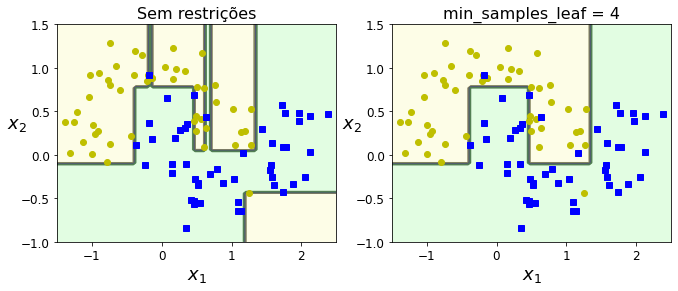

In [13]:
eixos = [-1.5, 2.5, -1, 1.5]

plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=eixos,
                       iris=False)
plt.title('Sem restrições', fontsize=16)

plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=eixos,
                      iris=False)
plt.title(f'min_samples_leaf = {deep_tree_clf2.min_samples_leaf}',
         fontsize=16)

plt.show()

### Regressão

As Árvores de Decisão também podem ser usadas para classificação. Vamos construir uma árvore de regressão usando a classe do Scikit-Learn **DecisionTreeRegressor**. Treinaremos esse modelo com um conjunto de dados quadráticos confuso, com duas profundidades:

In [28]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

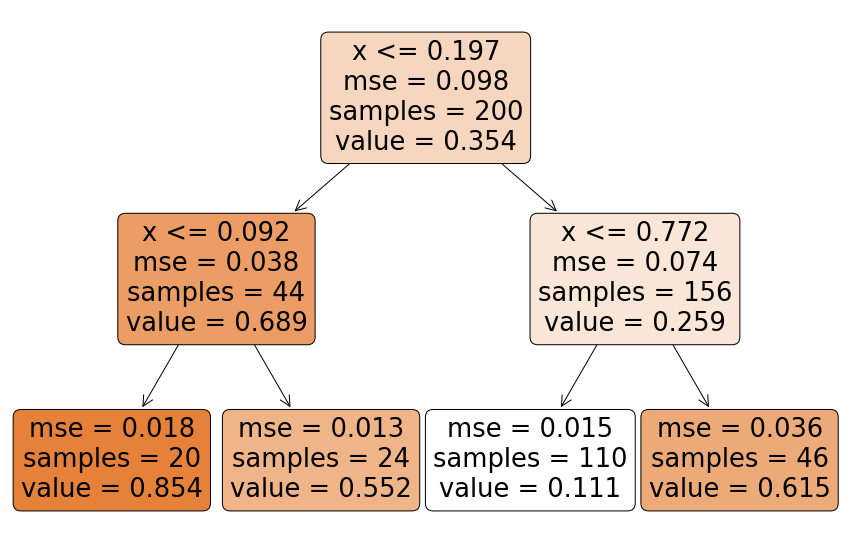

In [31]:
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_reg,
              feature_names='x',
              rounded=True,
              filled=True)

plt.show()

A árvore acima parece muito com a que fizemos no começo do capítulo. A principal diferença é que ap invés de prever uma classe em cada nó, ela prevê um valor. Por exemplo, suponha que queiramos realizar uma previsão para uma nova instância com *x = 0,6*. Podemos atravessar a árvore começando pela raiz até chegar ao nó da folha que prevê um **value** de 0,111. Esta previsão é simplesmente o valor-alvo médio das 110 instâncias de treino acossiadas a este nó da folha. Esta previsão retorna um MSE de 0,015 sobre as 110 instâncias.

As previsões feitas por esse modelo estão no código abaixo. Se definirmos as profundidades para 3, obteremos previsões plotadas no lado direito. Note como o valor previsto para cada região é sempre o valor-alvo médio das instâncias presentes nela. O algoritmo divide a região de uma forma que a maior parte das instâncias de treino aproximem-se o máximo possível do valor previsto:

In [32]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

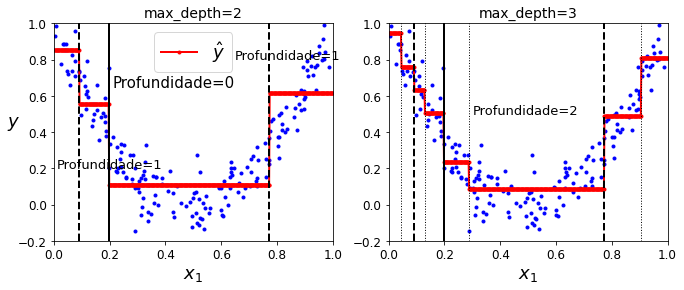

In [33]:
def plot_regression_predictions(tree_reg, X, y,
                                axes, ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
eixos = [0, 1, -0.2, 1]
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y, axes=eixos)
for split, style in ((0.1973, "k-"), (0.0917, "k--"),
                     (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Profundidade=0", fontsize=15)
plt.text(0.01, 0.2, "Profundidade=1", fontsize=13)
plt.text(0.65, 0.8, "Profundidade=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, axes=eixos,
                            ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Profundidade=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

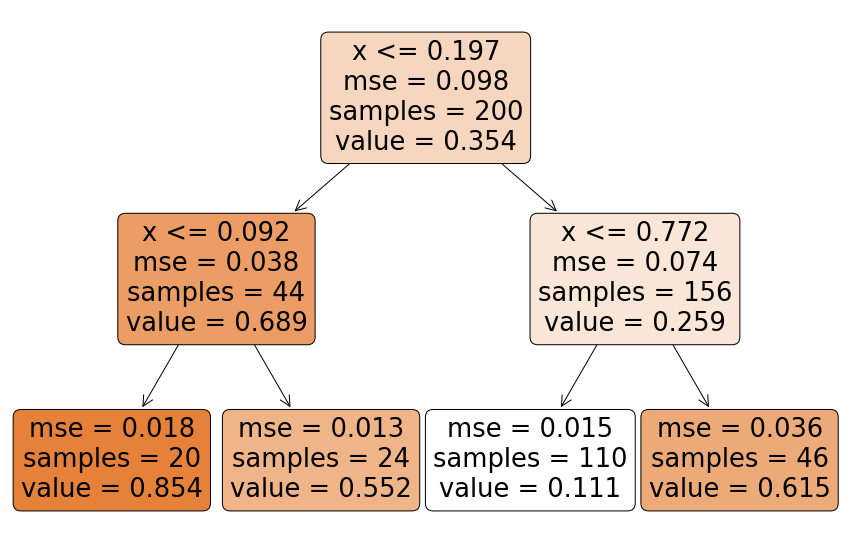

In [34]:
# Para max_depth = 2
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_reg1,
              feature_names='x',
              rounded=True,
              filled=True)

plt.show()

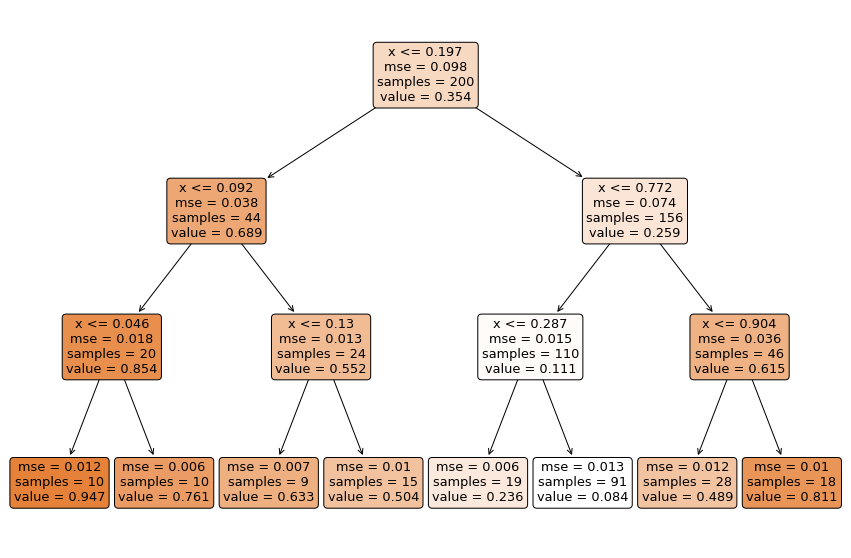

In [36]:
# Para max_depth = 3
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_reg2,
              feature_names='x',
              rounded=True,
              filled=True)

plt.show()

O algoritmo CART trabalha mais ou menos da mesma maneira, exceto pelo fato de ao invés de tentar dividir o conjunto de treino de forma a minimizar a inpureza, ele tenta dividi-lo de forma a minimizar o MSE. A equação abaixo mostra a função de custo.

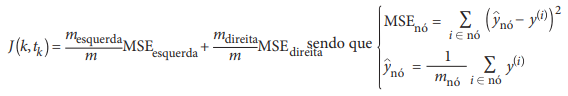

***Equação 6-4. A função CART de custo para regressão***

Do mesmo modo para as tarefas de classificação, as Árvores de Decisão são propensas a sobreajustes quando as usamos para regressão. Se não houver regularização (usar os hiperarâmetros padrão), podemos obter as previsões na plotagem da esquerda no código a seguir. Está claro que o conjunto de treino está muito sobreajustado. Se configurarmos o **min_samples_leaf** para 10, o resultado é bem mais razoável, plotagem à direita:

In [37]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42,
                                  min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

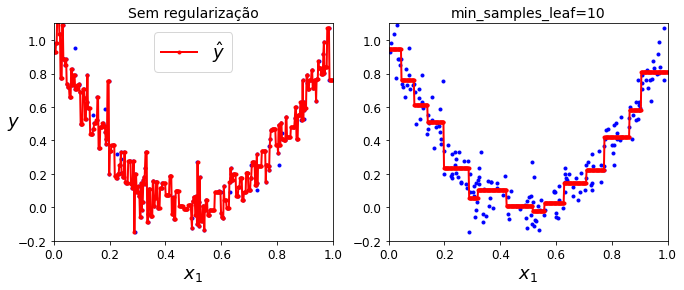

In [38]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("Sem regularização", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}",
          fontsize=14)

plt.show()

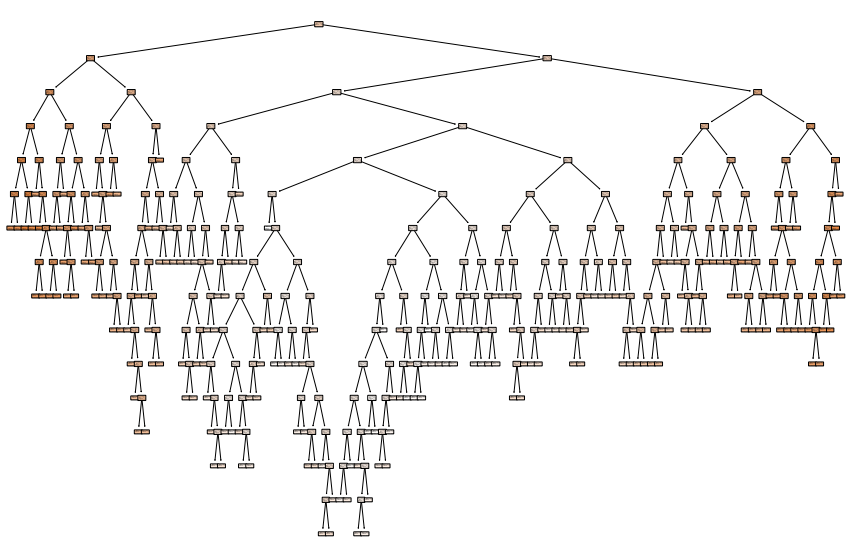

In [39]:
# Sem regularização
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_reg1,
              feature_names='x',
              rounded=True,
              filled=True)

plt.show()

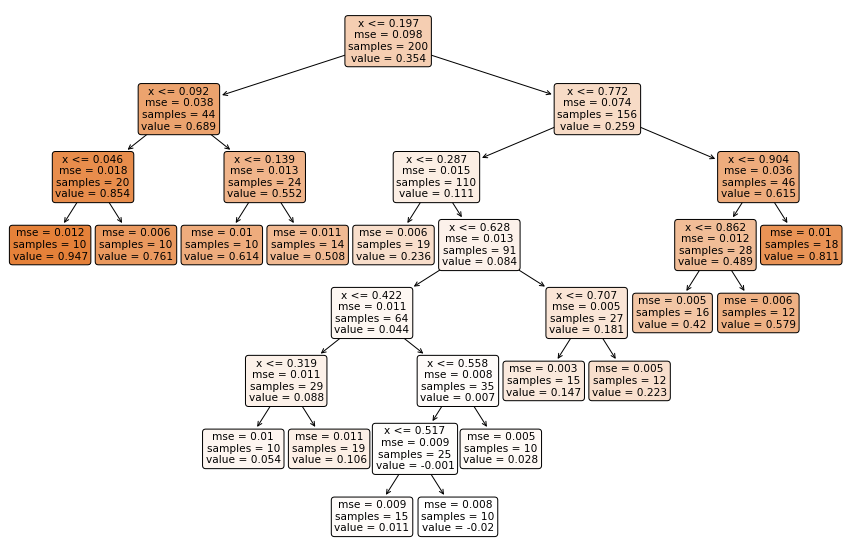

In [40]:
# Com regularização (min_samples_leaf=10)
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_reg2,
              feature_names='x',
              rounded=True,
              filled=True)

plt.show()

### Instabilidade

As Árvores de Decisão possuem diversas vantagens: são poderosas, fáceis de usar, interpretar e entender, e são muito versáteis. Contudo, elas possuem algumas limitações. Primero, como podemos ter notado, as Árvores de Decisão gostam de limites ortogonais de decisão, as divisões são feitas de modo perpendiclar a um eixo (escadinha), o que as deixa muito sensíveis à rotação do conjunto de treino, Por exemplo, o código abaixo mostra um simples conjunto de dados linearmente separáveis: na plotagem da esquerda uma Árvore de Decisão pode dividi-lo de modo fácil, mas na direita, o conjunto foi rotacionado em 45º, o limite de decisão parece desnecessáriamente retorcido. Embora ambas as árvores se moldem perfeitamente ao conjunto de treino, é bem provável que o modelo mostrado na direita não generalize muito bem. Uma solução para isso é usar o PCA (veremos no Capítulo 8), o que, na maior parte das vezes, resulta em uma melhor orientação dos dados de treino:

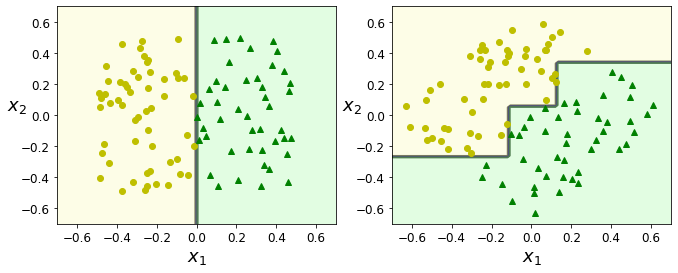

In [42]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                           [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
eixo = [-0.7, 0.7, -0.7, 0.7]
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=eixo,
                       iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=eixo,
                      iris=False)

plt.show()

De uma maneira mais geral, o principal problema com as Árvores de Decisão é que elas são bem sensíveis a pequenas variações nos dados de treino. Por exemplo, se removermos a Iris Versicolor mais larga do conjunto de treino da íris (a flor com pétalas de 4,8 cm de comprimento e 1,8 cm de largura) e treinar uma nova Árvore de Decisão, podemos obter o modelo apresentado na plotagem abaixo:

In [43]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [44]:
# maior Iris Versicolor
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [46]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2,
                                         random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

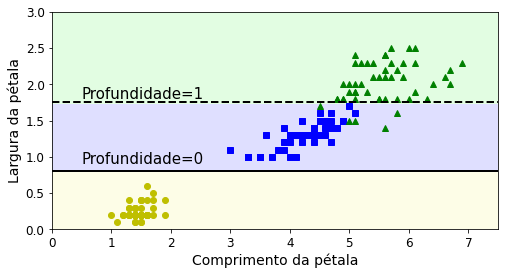

In [48]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked,
                      legend=False)
plt.plot([0, 7.5], [0.8, 0.8], 'k-', linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.text(0.5, 0.9, 'Profundidade=0', fontsize=15)
plt.text(0.5, 1.80, 'Profundidade=1', fontsize=15)

plt.show()

Como podemos notar, é bem diferente da primeira plotagem com todos os dados de treino. Na verdade, uma vez que o algoritmo de treino usado pelo Scikit-Learn é estocástico, podemos obter modelos bem diferentees mesmo com os mesmos dados de treino (a menos que o hiperparâmetro **random_state** seja definido).

Essa instabilidade pode ser limitada com o uso das Florestas Aleatórias, como veremos no capítulo seguinte.

### Exercícios

**1. Qual é a profundidade aproximada de uma Árvore de Decisão treinada (sem
restrições) em um conjunto com 1 milhão de instâncias?**

A profundidade de uma árvore binária bem balanceada contendo *m* folhas é igual a log2(m), arredondando para cima. Uma Árvore de Decisão binária (somente *True* e *False*, como todas do Scikit-Learn) ficará mais ou menos equilibrada ao final do treino, com uma folha por instância de treino se for treinada sem restrições. Desse modo, se o conjunto de treino contiver milhões de instâcias, a Árvore de Decisão terá uma profundidade de log2(10^6) ≈ 20. Pode ser um pouco mais, uma vez que a árvore geralmente não ficará perfeitamente equilibrada.

**2. O coeficiente Gini de um nó geralmente é menor ou maior do que o dos seus pais? Ele
é geralmente menor/maior, ou sempre menor/maior?**

O coeficiente de Gini de um nó na maior parte daz vezes é menor do que a de seus pais devido a função de custo do CART, qe separa cada nó de maneira a minimizar a soma ponderada dos coeficientes de Gini de seus filhos. Todavia, é possível que um nó possua o valor de Gini maior que seu pai, desde que esse aumento seja maos do que compensado pela diminuição da impureza do outro filho. Por exemplo, consideramos um nó contendo quatro instâncias da classe A e uma da classe B, o valor de Gini é -(1^2/5) - (4^2/5) = 0,32. Agora, imagine que o conjunto de dados seja unidimensional e as instâncias estejam alinhadas na seguinte ordem: A, B, A, A, A. Verificamos que o algoritmo dividirá este nó após a segunda instância produzindo um nó filho com instâncias A, B e o outro nó filgo, com A, A ,A. O primeiro coeficiente do nó filho é -(1^2/2) - (1^2/2) 0,5; que é mais alto que o nó pai.Isto é compensado pelo fato que o outro nó gerado é puro, então o coeficiente ponderado geral de Gini é (2/5 * 0,5) + (3/5 * 0) = 0,2; que é inferior ao valor de Gini do pai.

**3. É uma boa ideia tentar diminuir seu *max_depth* se uma Árvore de Decisão estiver
se sobreajustando ao conjunto de treinamento?**

É uma boa ideia sim, uma vez que isso restringirá o modelo, regularizando-o.

**4. É uma boa ideia tentar dimensionar as características de entrada se uma Árvore
de Decisão estiver se subajustando ao conjunto de treinamento?**

As Árvores de Decisão não se importam se os dados de treino são escalonados ou não; esse é uma das vantagens de usar esse algoritmo. Logo, será um desperdício de tempo apenas para dimensionar os recursos de entrada se esse algoritmo começar a se subajustar aos dados de treino.

**5. Se treinar uma Árvore de Decisão em um conjunto de treinamento contendo 1
milhão de instâncias demora 1 hora, aproximadamente quanto tempo demorará
para treinar outra Árvore de Decisão em um conjunto de treinamento contendo
10 milhões de instâncias?**

A complexidade dos cálculos de treino de uma Árvore de Decisão é O(n x mlog(m)). Portanto, se multiplicarmos o tamanho do conjunto de treino por 10, o tempo de treino será multiplicado por K = (n x 10m x log(10m)) / (n x m x log(m)) = 10 x log(10m) / log(m). Se *m = 10^6*, então K será aproximadamente 11,7 horas de treino.

**6. Se o seu conjunto de treinamento contém 100 mil instâncias, a configuração
*presort=True* acelerará o treinamento?**

A pré-qualificação do conjunto de treino acelera o treinamento somente se o conjunto de dados for menor que algumas milhares de instâncias. Definir **presort** como *True*, reduzirá consideravelmente o conjunto de treino contiver 100 mil instâncias.

**7. Treine e ajuste uma Árvore de Decisão para o conjunto de dados de luas.**

a. Gere um conjunto de dados de luas utilizando make_moons(**n_samples=10000**, **noise=0.4**).

In [49]:
from sklearn.datasets import make_moons
X ,y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Com a utilização do **train_test_split()**, divida em um conjunto de treinamento e um conjunto de testes.

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Utilize a pesquisa de grade com validação cruzada (com a ajuda da classe **GridSearchCV**) para encontrar bons valores de hiperparâmetros para um **DecisionTreeClassifier**. Dica: tente vários valores para **max_leaf_nodes**.

In [53]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)),
         'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [59]:
grid_search_cv.best_estimator_.max_leaf_nodes

17

In [60]:
grid_search_cv.best_estimator_.min_samples_split

2

d. Treine-o no conjunto completo de treinamento utilizando estes hiperparâmetros e meça o desempenho do seu modelo no conjunto de teste. Você deve obter aproximadamente 85% a 87% de acurácia.

In [61]:
from sklearn.metrics import accuracy_score
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

**8. Cultive uma floresta.**

a. Continuando o exercício anterior, gere mil subconjuntos do conjunto de treinamento, cada um contendo 100 instâncias selecionadas aleatoriamente. Dica: você pode utilizar a classe **ShuffleSplit** do Scikit-Learn para isso.

In [62]:
from sklearn.model_selection import ShuffleSplit
n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees,
                  test_size=len(X_train)-n_instances,
                 random_state=42)

for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Treine uma Árvore de Decisão em cada subconjunto utilizando os melhores valores do hiperparâmetro encontrados acima. Avalie essas mil Árvores de Decisão no conjunto de testes. Uma vez treinadas em conjuntos menores, essas Árvores de Decisão provavelmente terão um desempenho pior do que a primeira, alcançando apenas 80% de acurácia.

In [66]:
from sklearn.base import clone
forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

c. Agora vem a mágica. Gere as previsões das mil Árvores de Decisão e mantenha apenas a previsão mais frequente para cada instância do conjunto de testes (você pode utilizar a função **mode()** do SciPy para isso). Isso lhe dá previsões dos votos majoritários sobre o conjunto de testes.

In [68]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [70]:
from scipy.stats import mode
y_pred_majoritary_votes, n_votes = mode(Y_pred, axis=0)

d. Avalie estas previsões no conjunto de teste: você deve obter uma acurácia ligeiramente maior que o seu primeiro modelo (cerca de 0,5 a 1,5% a mais). Parabéns, você treinou um classificador de Floresta Aleatória!

In [71]:
accuracy_score(y_test, y_pred_majoritary_votes.reshape([-1]))

0.872

# Término: 06/10/2021